In [20]:
#Assignment-7
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#print(X_train)
#print(X_test)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test, y_pred)
print(cm)
as1 = accuracy_score(y_test, y_pred)
print(as1)

[[65  3]
 [ 8 24]]
0.89


Dataset Overview:
   Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
3         38.0        83         1.5               82.0          clear   
4         27.0        74        17.0               66.0       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter              2.5  mountain   

  Weather Type  
0        Rainy  
1       Cloudy  
2        Sunny  
3        Sunny  
4        Rainy  

S

C:\Users\HP\AppData\Local\Temp\ipykernel_18344\3433523993.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_18344\3433523993.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

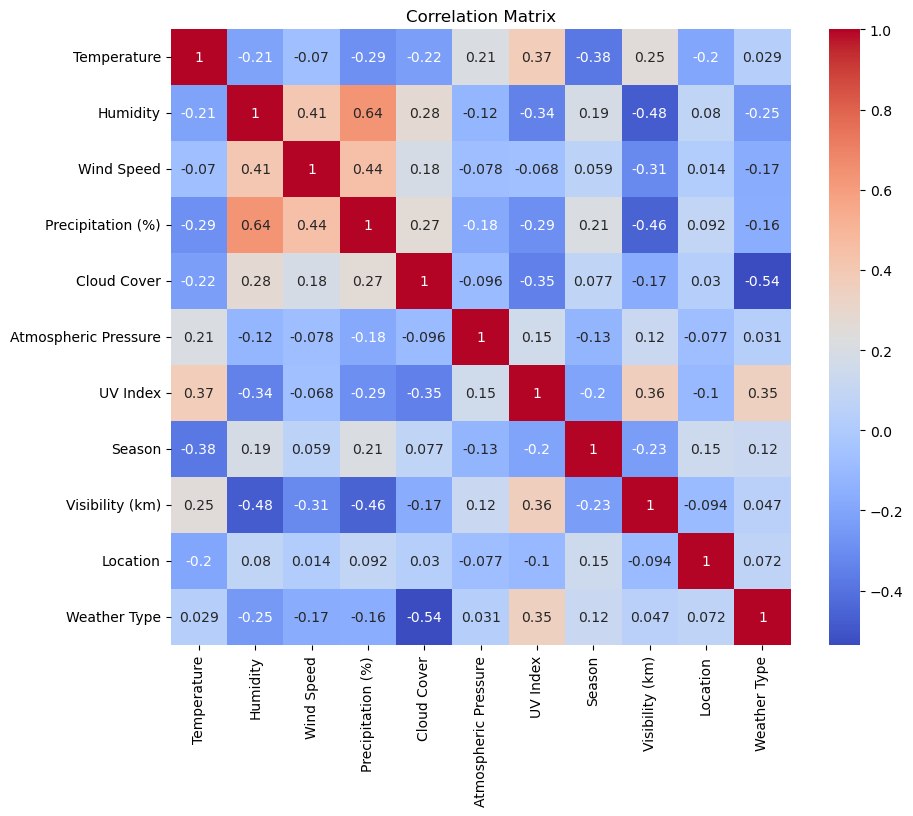


Confusion Matrix:
[[569  51  15  16]
 [ 41 571  23  12]
 [ 17  18 654  12]
 [ 44  22  15 560]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       651
           1       0.86      0.88      0.87       647
           2       0.93      0.93      0.93       701
           3       0.93      0.87      0.90       641

    accuracy                           0.89      2640
   macro avg       0.89      0.89      0.89      2640
weighted avg       0.89      0.89      0.89      2640


Accuracy Score:
0.8916666666666667


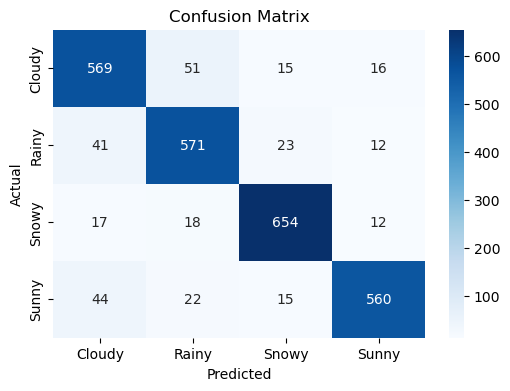

In [3]:
#Assignment-8
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("weather.csv")

# Data overview
print("Dataset Overview:")
print(data.head())
print("\nSummary of Dataset:")
print(data.info())

# Handle missing values
for col in data.columns:
    if data[col].dtype in ['int64', 'float64']:
        data[col].fillna(data[col].mean(), inplace=True)
    else:
        data[col].fillna('Unknown', inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
categorical_columns = ['Cloud Cover', 'Season', 'Location', 'Weather Type']
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Data exploration
print("\nSummary statistics of numerical columns:")
print(data.describe())

# Correlation matrix for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Separate features (X) and target (y)
X = data.drop('Weather Type', axis=1)
y = data['Weather Type']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model selection and training (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Model evaluation
y_pred = knn.predict(X_test_scaled)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [12]:
#Assignment-8(Example)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(X_train)

print(X_test)
print(y_test)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train)
print(X_test)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

print(classifier.predict(sc.transform([[30,87000]])))

y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]
 [    52  21000]
 [    53 104000]
 [    39  42000]
 [    38  61000]
 [    36  50000]
 [    36  63000]
 [    35  25000]
 [    35  50000]
 [    42  73000]
 [    47  49000]
 [    59  29000]
 [    49  65000]
 [    45 131000]
 [    31  89000]
 [    46  82000]
 [    47  51000]
 [    26  15000]
 [    60 102000]
 [    38 112000]
 [    40 107000]
 [    42  53000]
 [    35  59000]
 [    48  41000]
 [    48 134000]
 [    38 113000]
 [    29 148000]
 [    26  15000]
 [    60  42000]
 [    24  19000]
 [    42 149000]
 [    46  96000]
 [    28  59000]
 [    39  96000]
 [    28  89000]
 [    41  72000]
 [    45  26000]
 [    33  69000]
 [    20  82000]
 [    31  74000]
 [    42  80000]
 [    35  72000]
 [    33 149000]
 [    40  71000]
 [    51 146000]
 [    46  79000]
 [    35  75000]
 [    38  51000]
 [    36  75000]
 [    37  78000]
 [    38  61000]
 [    60 108000]
 [    20  82000]
 [    57  74000]
 [    42  65000]
 [    26  8000

0.93

First 5 rows of the dataset:
   temp   dew  humidity  sealevelpressure  winddir  solarradiation  windspeed  \
0  28.4  11.9      37.8            1016.4    147.5           216.1       16.6   
1  26.8  13.0      44.8            1017.2    110.3           215.7       16.6   
2  25.5  14.6      52.8            1015.7    145.3           221.1       18.4   
3  26.4  13.1      46.6            1015.3    126.9           216.2       16.6   
4  27.1  13.5      44.9            1014.4    125.5           208.1       16.6   

   precipprob  preciptype  year  month  day  
0           0           0  2016      1    1  
1           0           0  2016      1    2  
2           0           0  2016      1    3  
3           0           0  2016      1    4  
4           0           0  2016      1    5  

Summary statistics of the dataset:
              temp          dew     humidity  sealevelpressure      winddir  \
count  1781.000000  1781.000000  1781.000000       1781.000000  1781.000000   
mean     28.34

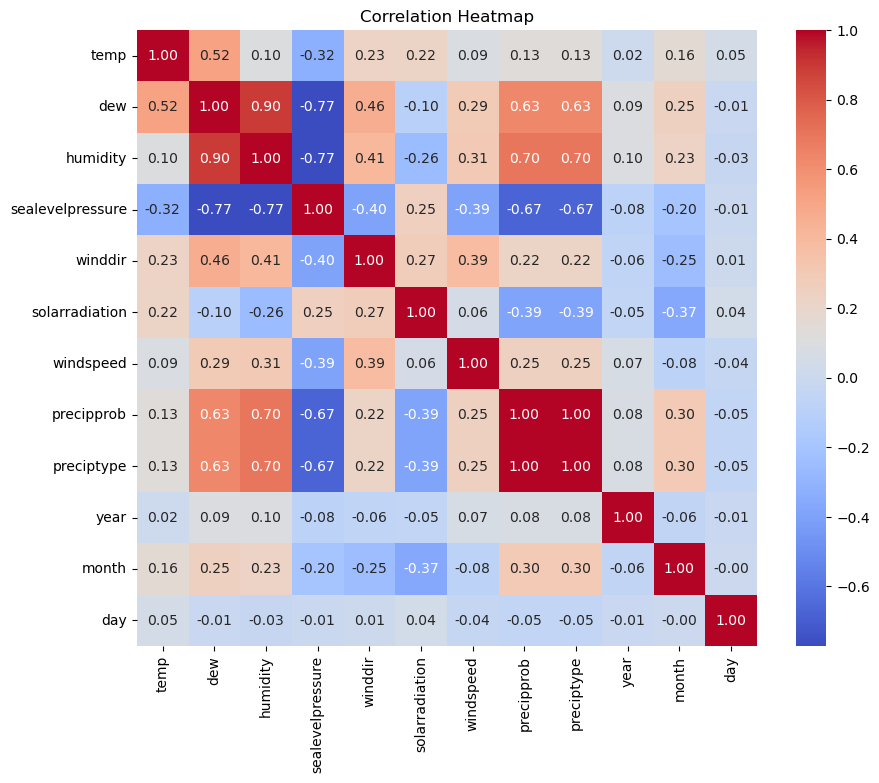

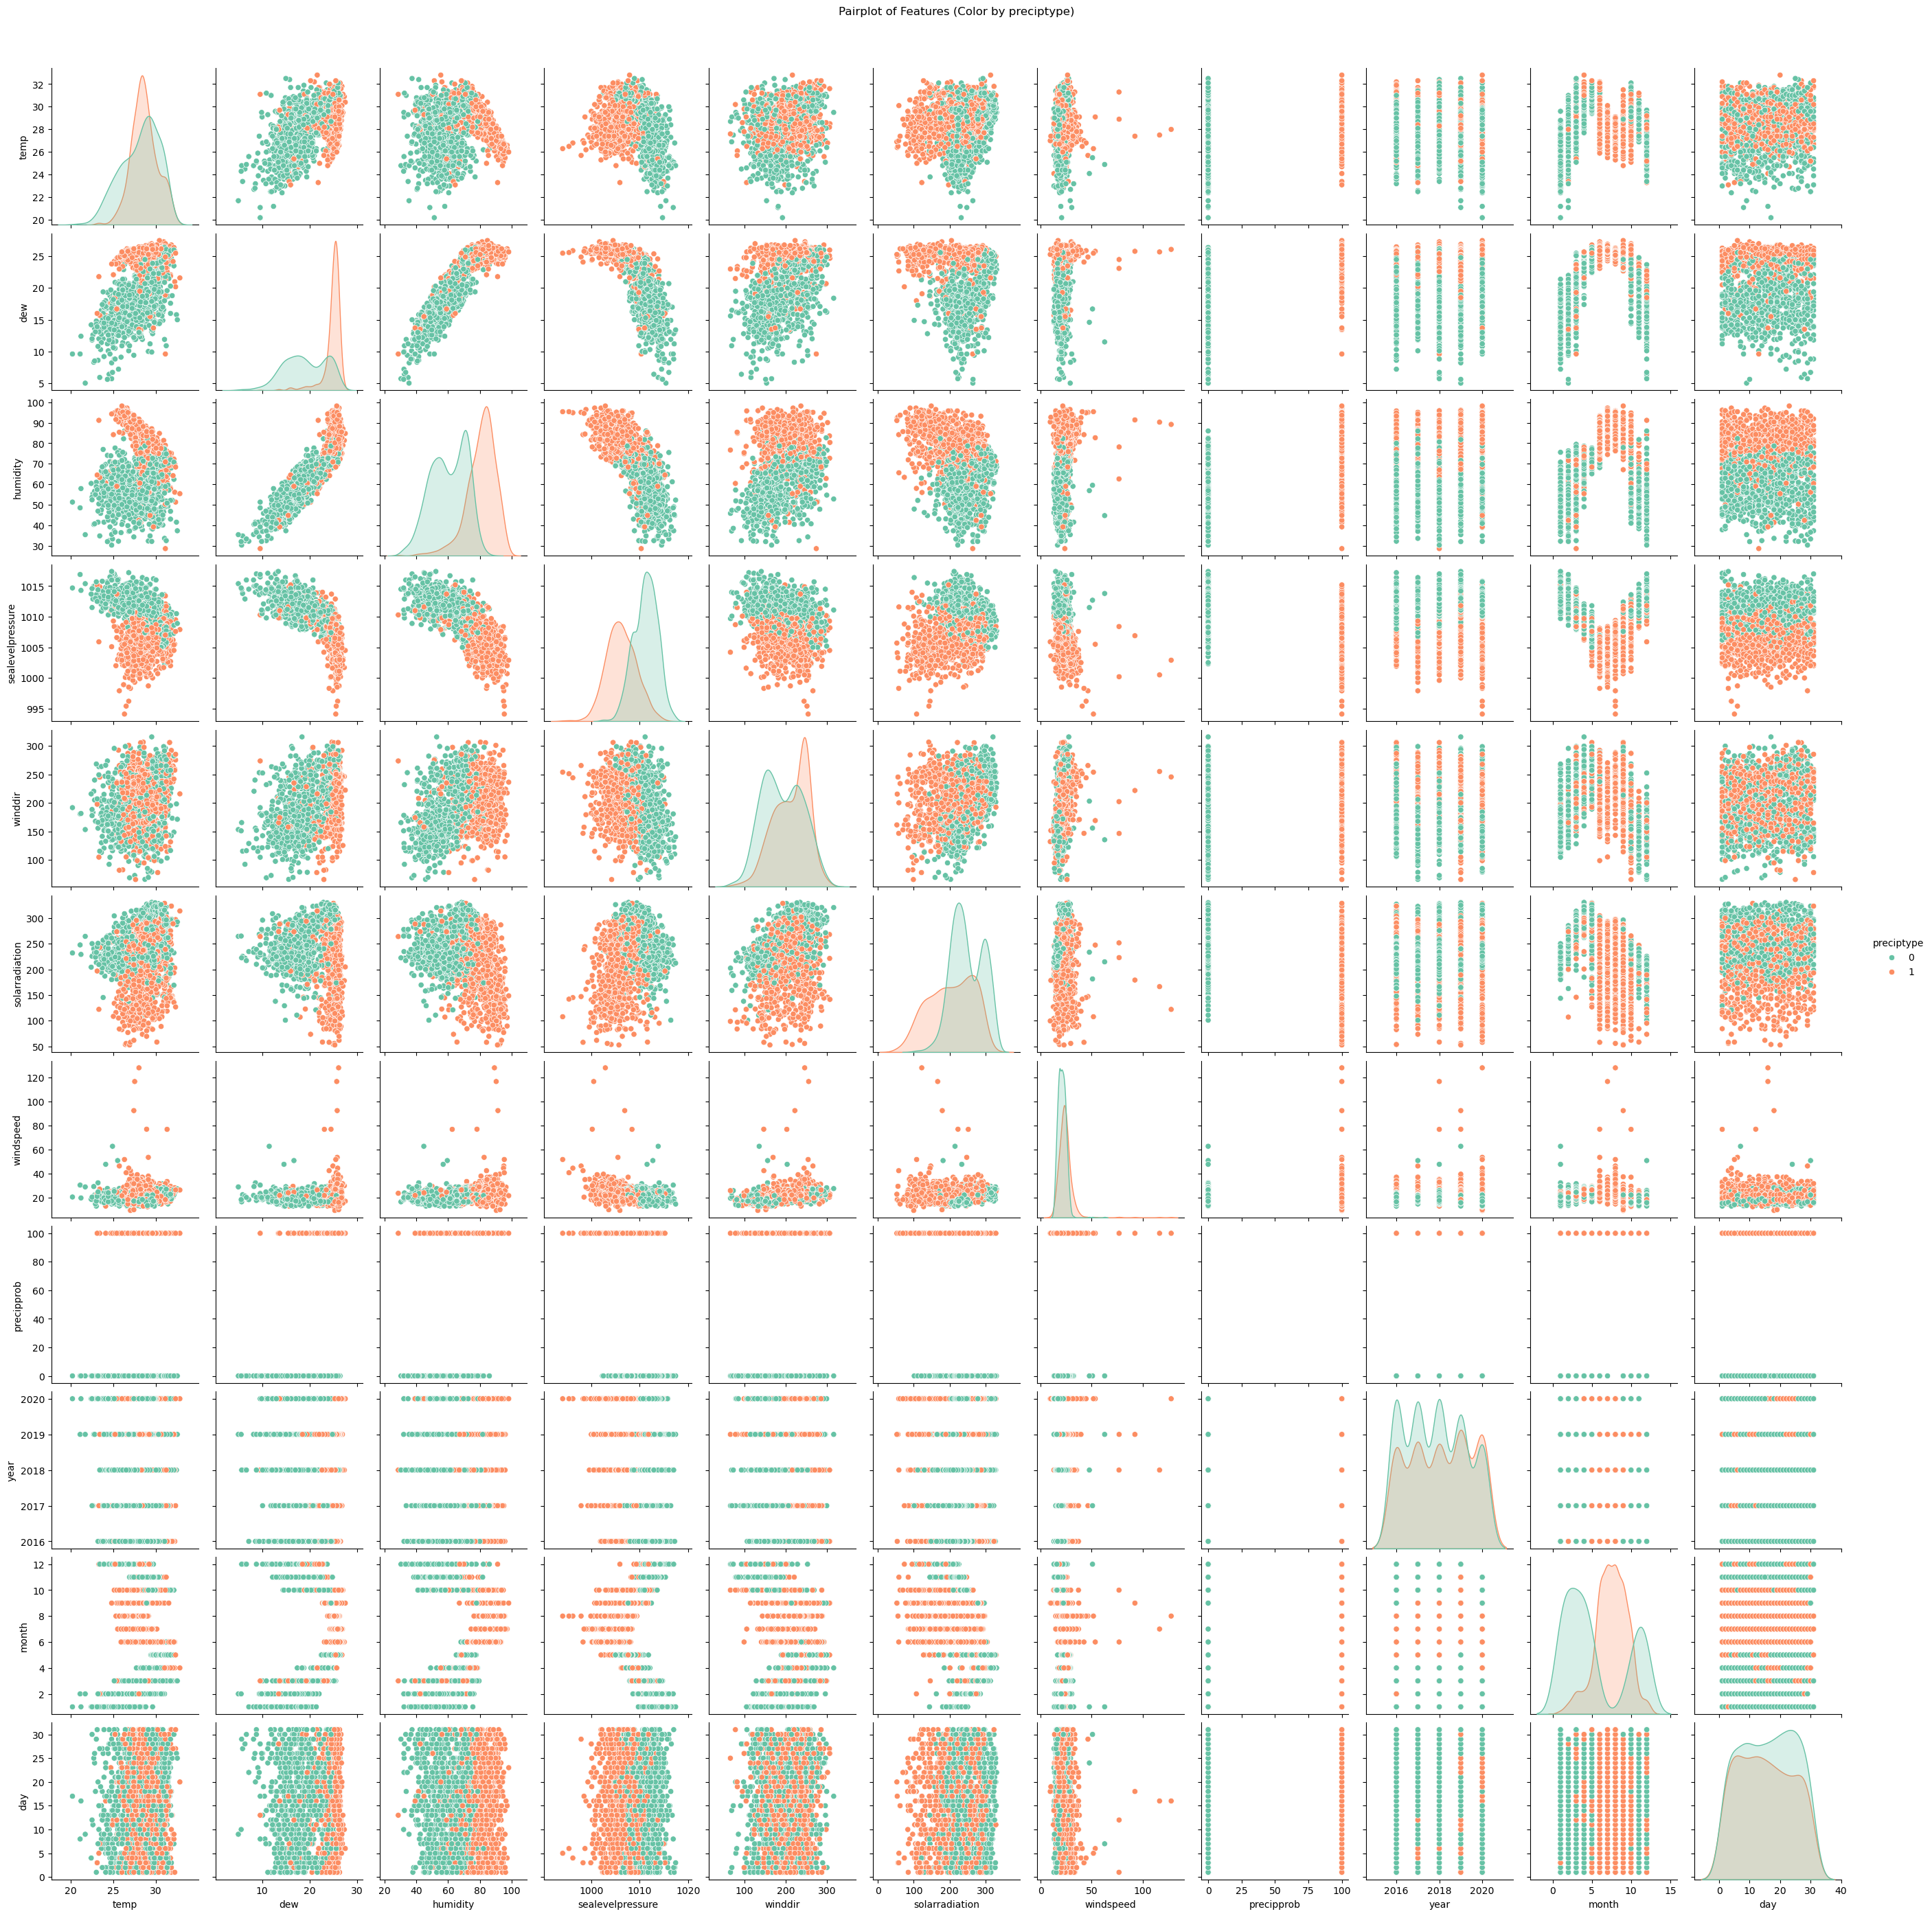

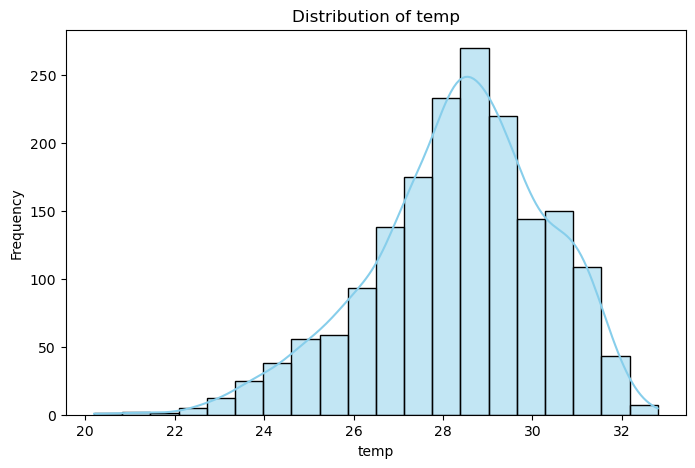

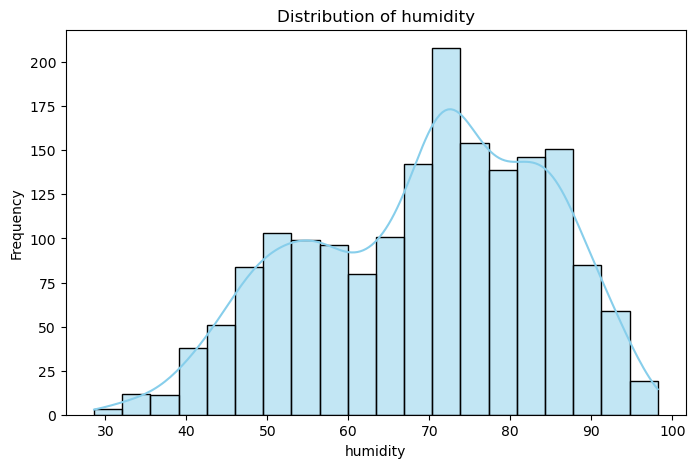

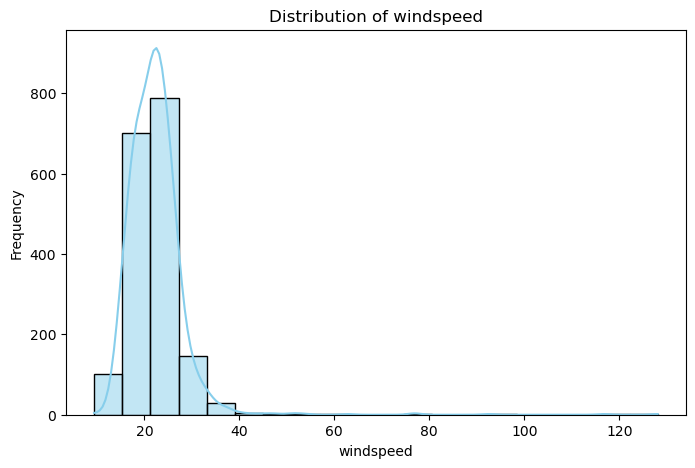


Model Accuracy: 0.9971988795518207

Confusion Matrix:


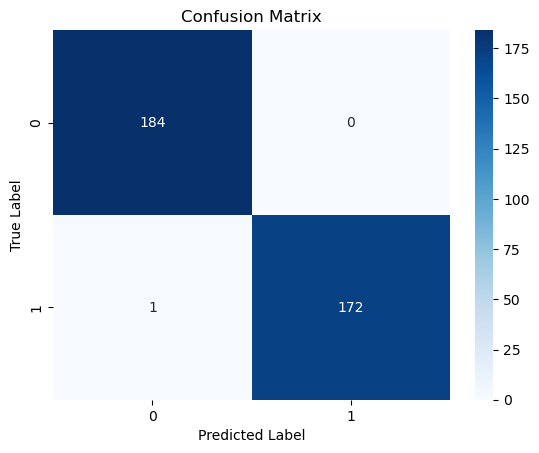


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       184
           1       1.00      0.99      1.00       173

    accuracy                           1.00       357
   macro avg       1.00      1.00      1.00       357
weighted avg       1.00      1.00      1.00       357



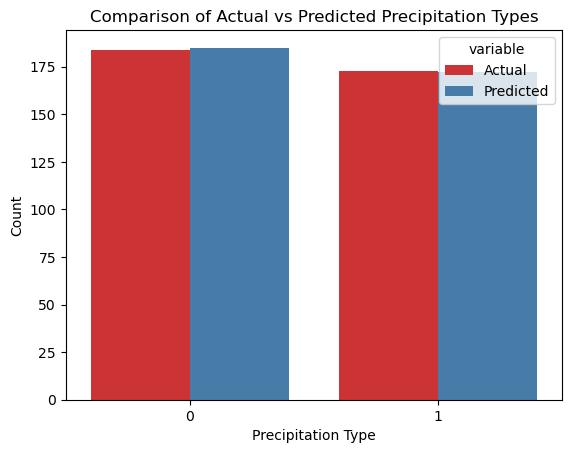

In [5]:
#Assignemt 9
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Load the dataset
file_path = "rainfall.csv"  # Replace with the actual path to your rainfall.csv file
data = pd.read_csv(file_path)

# Step 2: Handle the 'datetime' column
# Convert the 'datetime' column to pandas datetime format
data['datetime'] = pd.to_datetime(data['datetime'], format='%d-%m-%Y')

# Extract features from the datetime column
data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day

# Drop the original 'datetime' column as it is no longer needed
data.drop(columns=['datetime'], inplace=True)

# Step 3: Understand the dataset
print("First 5 rows of the dataset:")
print(data.head())

print("\nSummary statistics of the dataset:")
print(data.describe())

print("\nMissing values in the dataset:")
print(data.isnull().sum())

# Visualization 1: Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Visualization 2: Pairplot of features
sns.pairplot(data, diag_kind='kde', hue='preciptype', palette='Set2')
plt.suptitle("Pairplot of Features (Color by preciptype)", y=1.02)
plt.show()

# Step 4: Preprocess the dataset
# Separate features and target variable
X = data.drop(columns=['preciptype'])  # Features
y = data['preciptype']  # Target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualization 3: Distribution of a few features
for feature in ['temp', 'humidity', 'windspeed']:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[feature], kde=True, bins=20, color='skyblue')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 6: Train the KNN model
knn = KNeighborsClassifier(n_neighbors=3)  # Using 3 neighbors for KNN
knn.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = knn.predict(X_test)

# Step 8: Evaluate the model
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualization 4: Actual vs Predicted Comparison
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).reset_index(drop=True)
sns.countplot(data=comparison_df.melt(), x="value", hue="variable", palette="Set1")
plt.title("Comparison of Actual vs Predicted Precipitation Types")
plt.xlabel("Precipitation Type")
plt.ylabel("Count")
plt.show()

Accuracy: 0.93
Confusion Matrix:
 [[57  6]
 [ 1 36]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.90      0.94        63
           1       0.86      0.97      0.91        37

    accuracy                           0.93       100
   macro avg       0.92      0.94      0.93       100
weighted avg       0.94      0.93      0.93       100



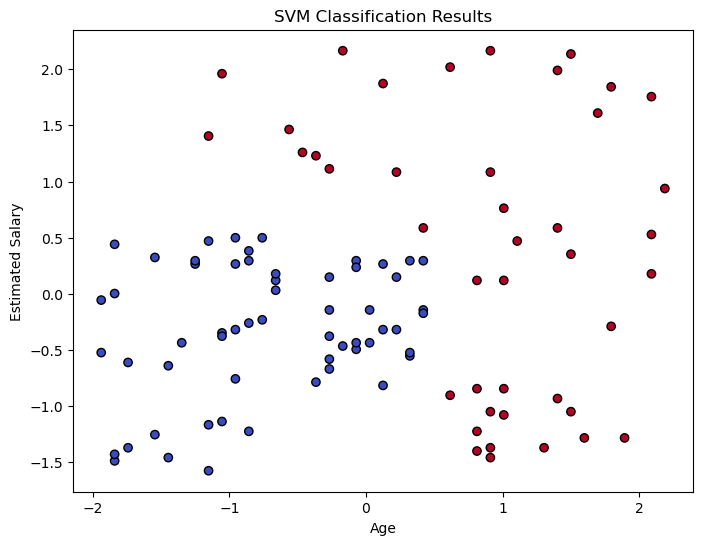

In [6]:
#Assignment 10
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv("Social_Network_Ads.csv")

# Select relevant features and target
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Visualization
plt.figure(figsize=(8,6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', edgecolors='k')
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.title("SVM Classification Results")
plt.show()

First 5 rows of the dataset:
   temp   dew  humidity  sealevelpressure  winddir  solarradiation  windspeed  \
0  28.4  11.9      37.8            1016.4    147.5           216.1       16.6   
1  26.8  13.0      44.8            1017.2    110.3           215.7       16.6   
2  25.5  14.6      52.8            1015.7    145.3           221.1       18.4   
3  26.4  13.1      46.6            1015.3    126.9           216.2       16.6   
4  27.1  13.5      44.9            1014.4    125.5           208.1       16.6   

   precipprob  preciptype  year  month  day  
0           0           0  2016      1    1  
1           0           0  2016      1    2  
2           0           0  2016      1    3  
3           0           0  2016      1    4  
4           0           0  2016      1    5  

Summary statistics of the dataset:
              temp          dew     humidity  sealevelpressure      winddir  \
count  1781.000000  1781.000000  1781.000000       1781.000000  1781.000000   
mean     28.34

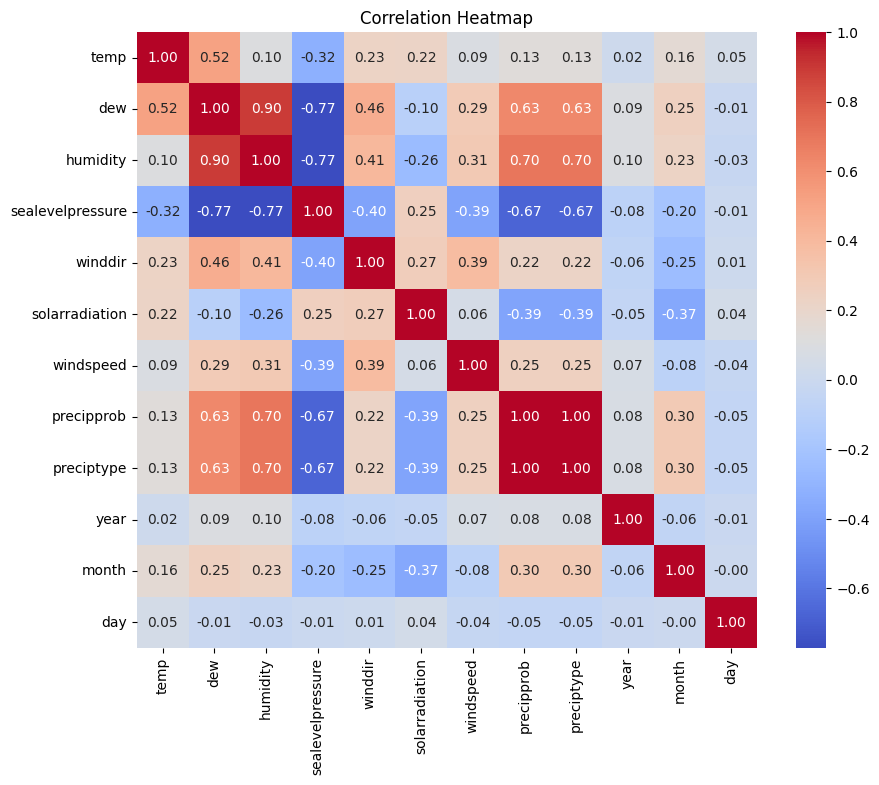

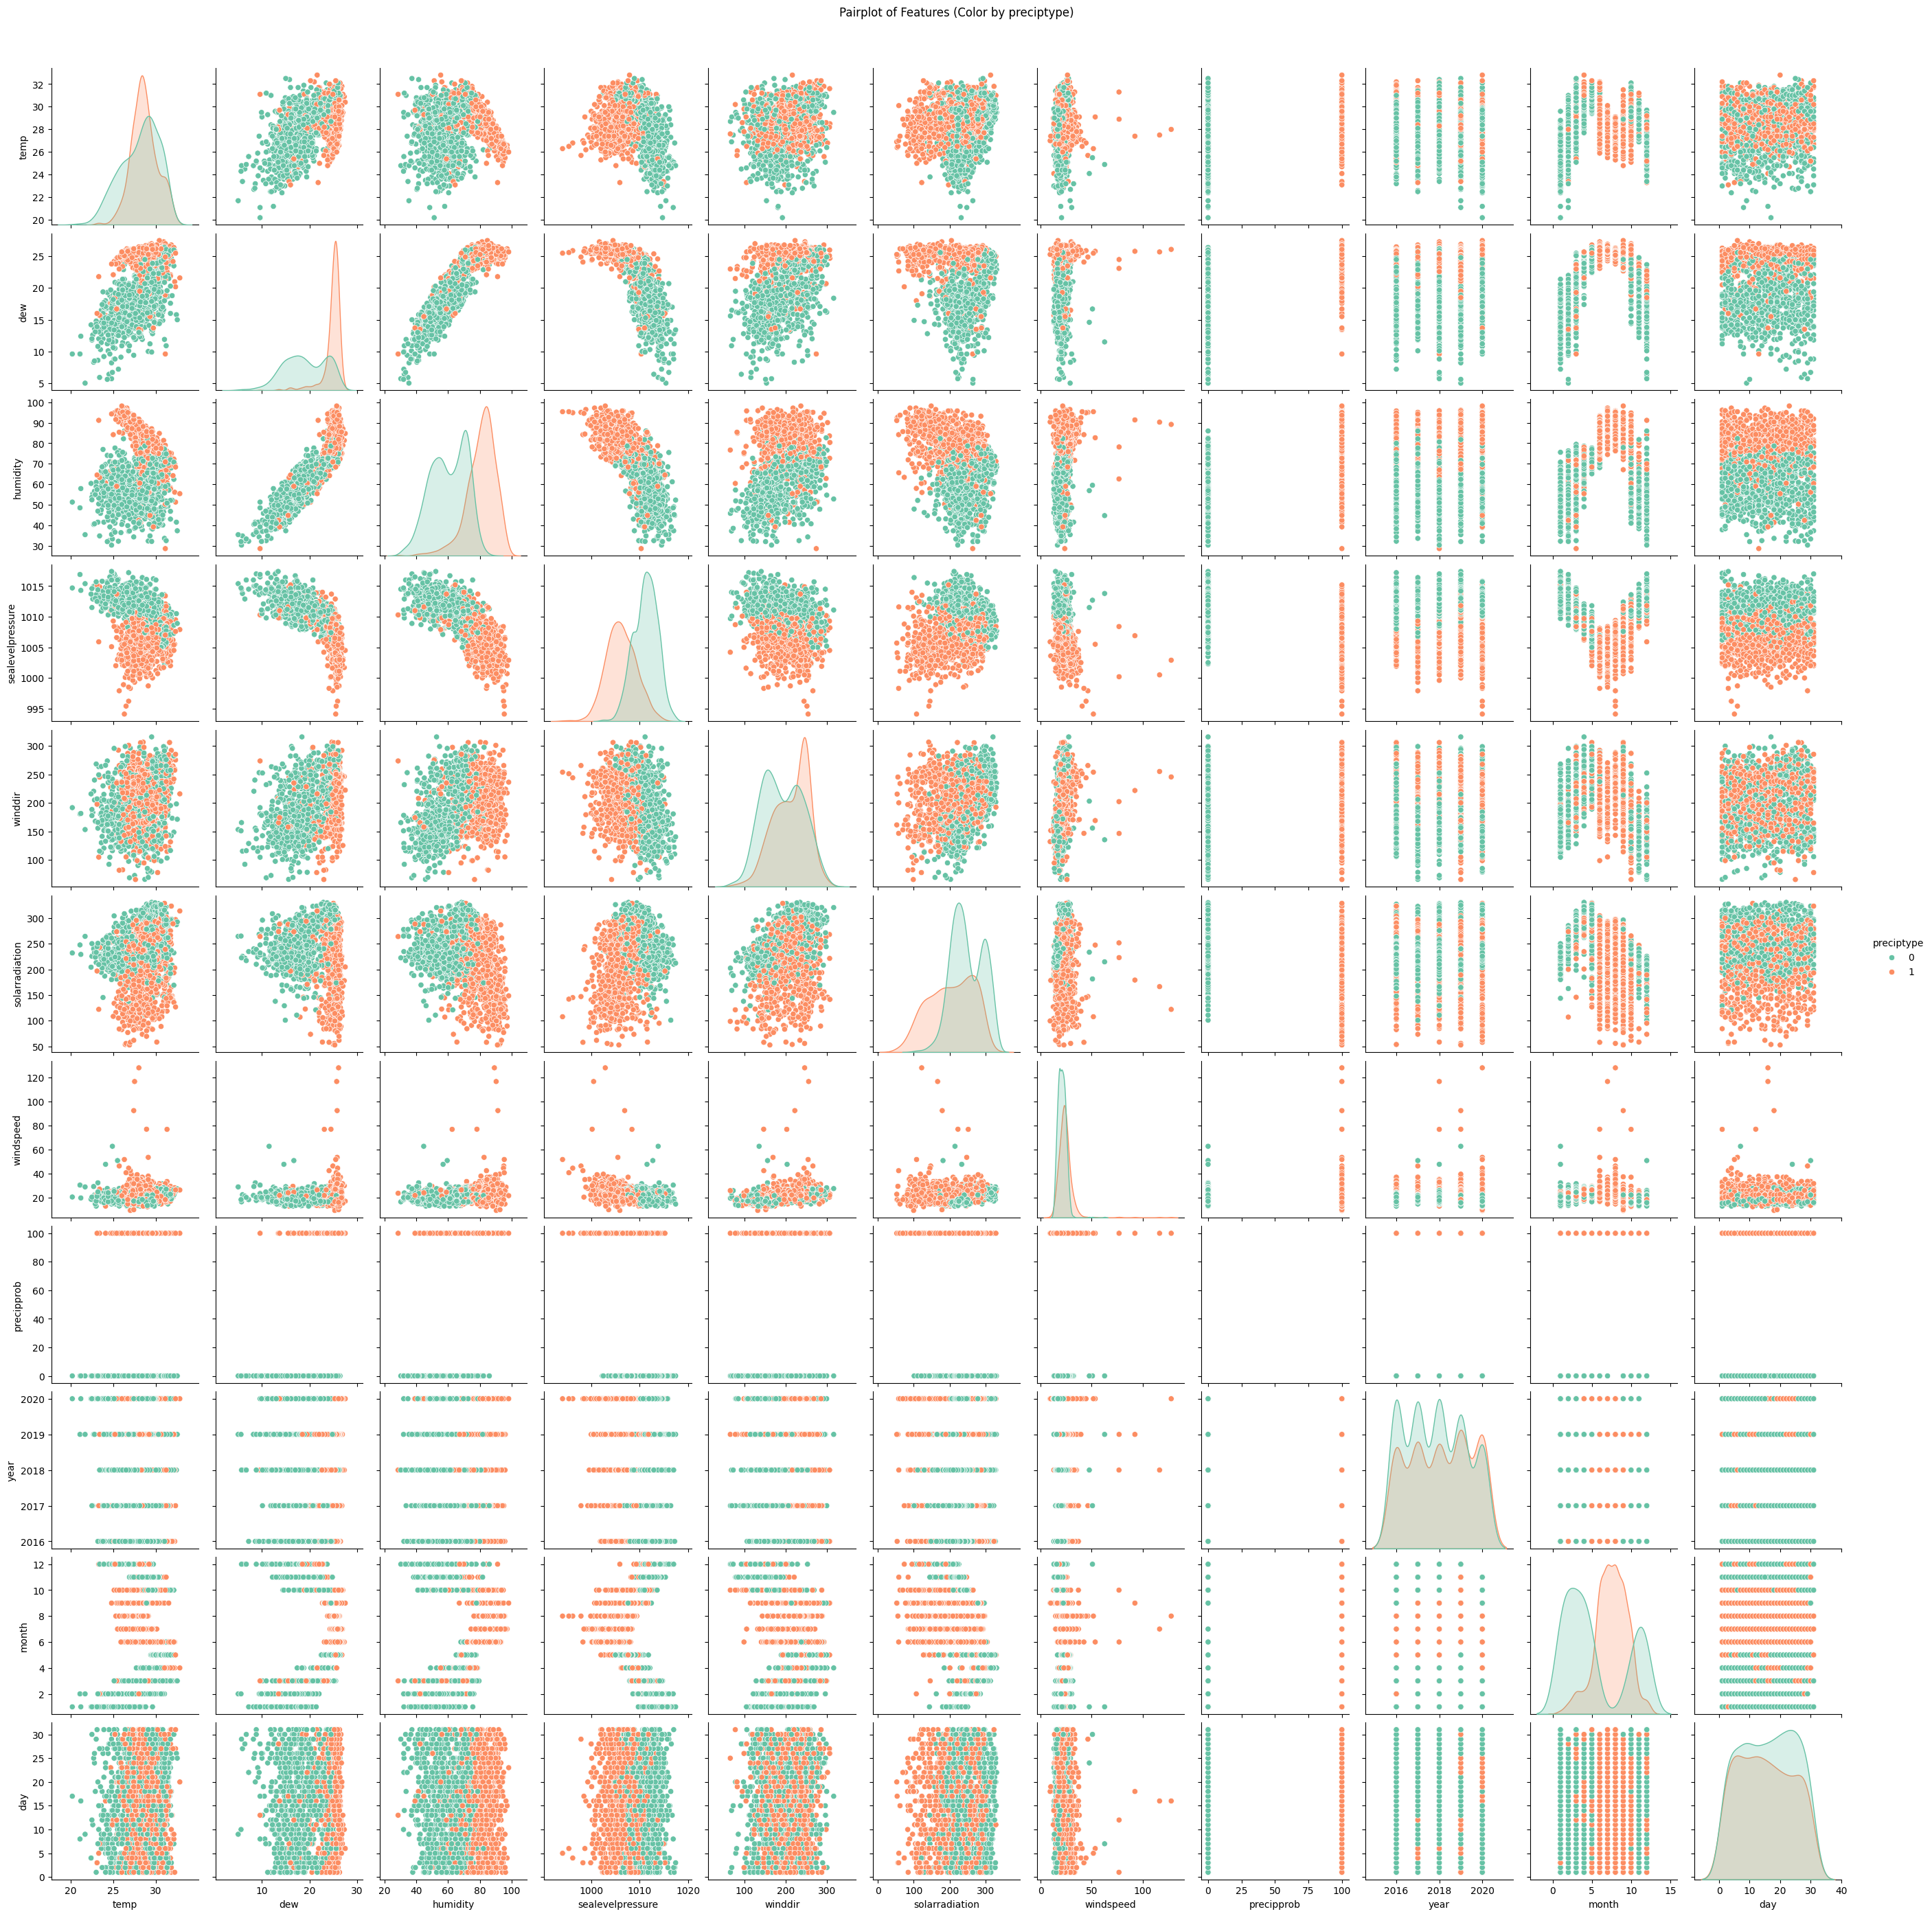

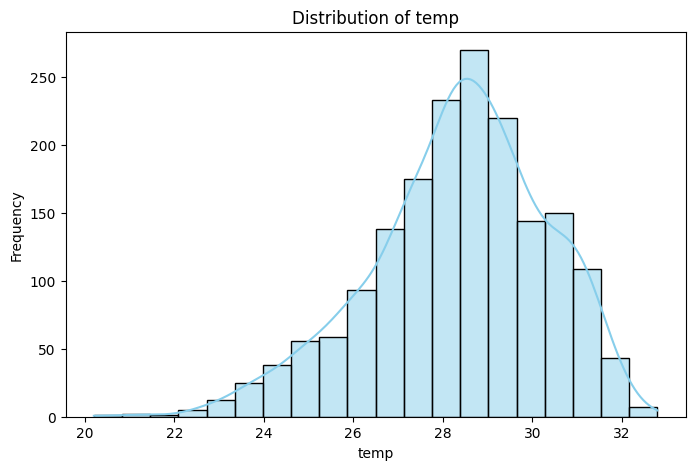

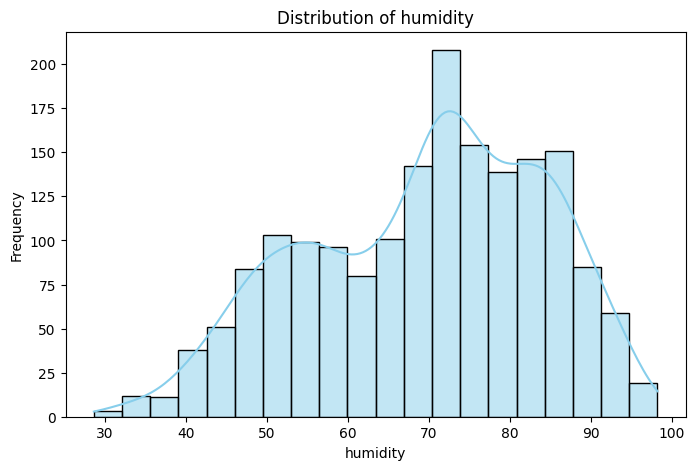

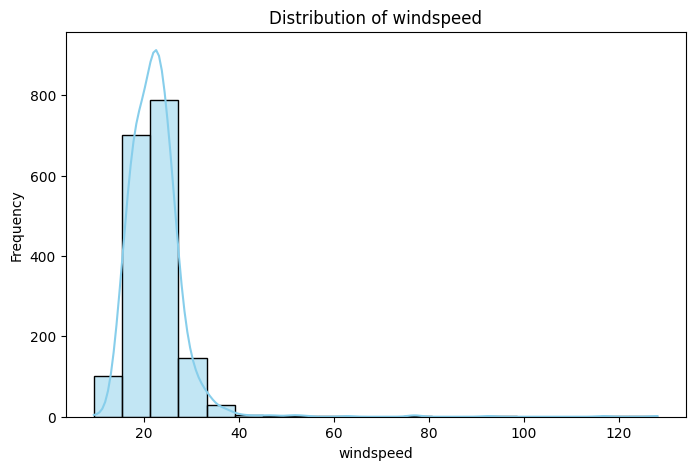


Model Accuracy: 0.9971988795518207

Confusion Matrix:


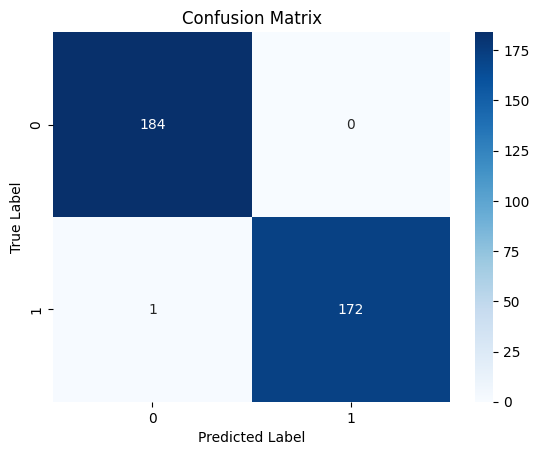


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       184
           1       1.00      0.99      1.00       173

    accuracy                           1.00       357
   macro avg       1.00      1.00      1.00       357
weighted avg       1.00      1.00      1.00       357



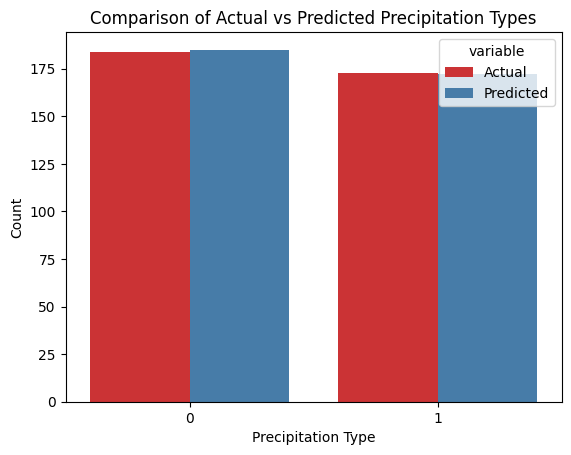

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Load the dataset
file_path = "rainfall.csv"  # Replace with the actual path to your rainfall.csv file
data = pd.read_csv(file_path)

# Step 2: Handle the 'datetime' column
# Convert the 'datetime' column to pandas datetime format
data['datetime'] = pd.to_datetime(data['datetime'], format='%d-%m-%Y')

# Extract features from the datetime column
data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day

# Drop the original 'datetime' column as it is no longer needed
data.drop(columns=['datetime'], inplace=True)

# Step 3: Understand the dataset
print("First 5 rows of the dataset:")
print(data.head())

print("\nSummary statistics of the dataset:")
print(data.describe())

print("\nMissing values in the dataset:")
print(data.isnull().sum())

# Visualization 1: Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Visualization 2: Pairplot of features
sns.pairplot(data, diag_kind='kde', hue='preciptype', palette='Set2')
plt.suptitle("Pairplot of Features (Color by preciptype)", y=1.02)
plt.show()

# Step 4: Preprocess the dataset
# Separate features and target variable
X = data.drop(columns=['preciptype'])  # Features
y = data['preciptype']  # Target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualization 3: Distribution of a few features
for feature in ['temp', 'humidity', 'windspeed']:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[feature], kde=True, bins=20, color='skyblue')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 6: Train the KNN model
knn = KNeighborsClassifier(n_neighbors=3)  # Using 3 neighbors for KNN
knn.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = knn.predict(X_test)

# Step 8: Evaluate the model
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualization 4: Actual vs Predicted Comparison
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).reset_index(drop=True)
sns.countplot(data=comparison_df.melt(), x="value", hue="variable", palette="Set1")
plt.title("Comparison of Actual vs Predicted Precipitation Types")
plt.xlabel("Precipitation Type")
plt.ylabel("Count")
plt.show()





Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   datetime          1781 non-null   datetime64[ns]
 1   temp              1781 non-null   float64       
 2   dew               1781 non-null   float64       
 3   humidity          1781 non-null   float64       
 4   sealevelpressure  1781 non-null   float64       
 5   winddir           1781 non-null   float64       
 6   solarradiation    1781 non-null   float64       
 7   windspeed         1781 non-null   float64       
 8   precipprob        1781 non-null   int64         
 9   preciptype        1781 non-null   int64         
dtypes: datetime64[ns](1), float64(7), int64(2)
memory usage: 139.3 KB
None

First few rows of data:
    datetime  temp   dew  humidity  sealevelpressure  winddir  solarradiation  \
0 2016-01-01  28.4  11.9      37.8        

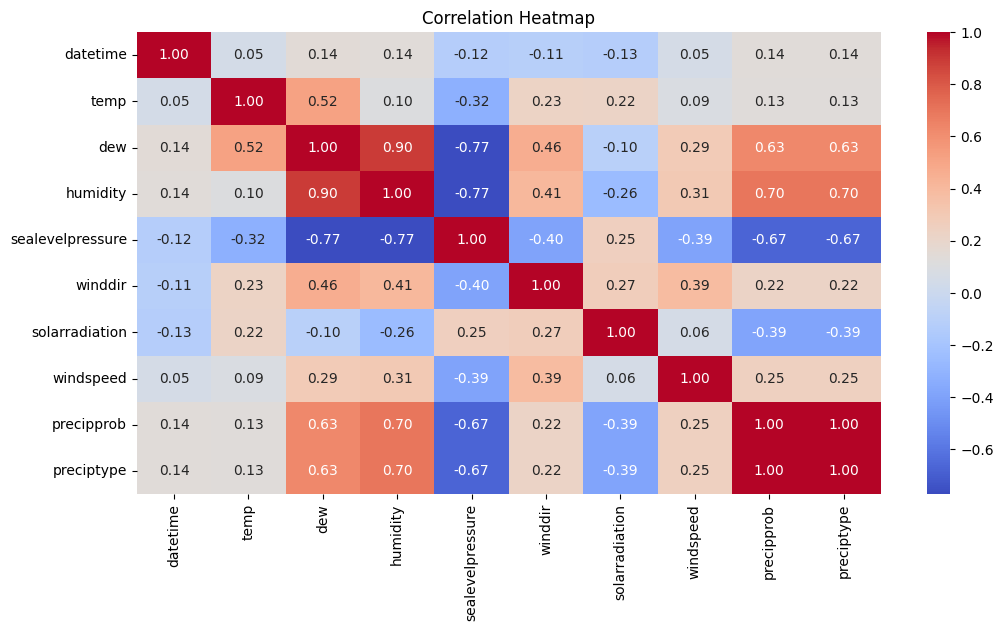

C:\Users\Shurti.Dangarh\AppData\Local\Temp\ipykernel_12780\4118428335.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['preciptype'], palette="Set2")


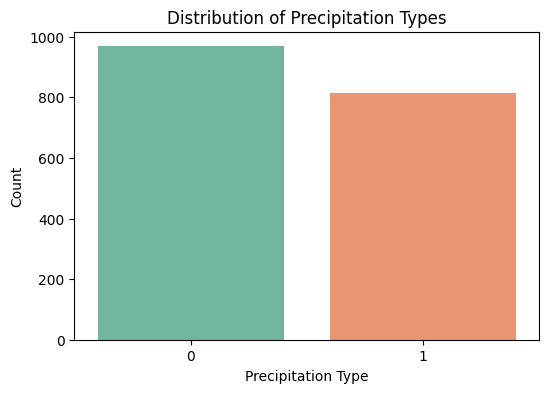

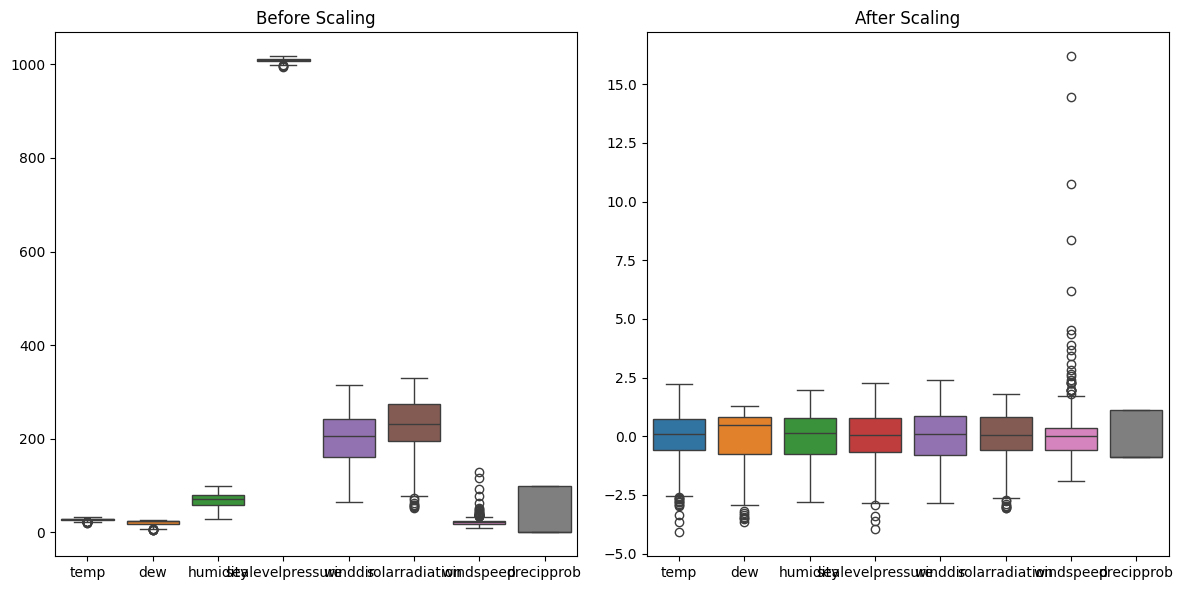

Model Accuracy (k=5): 1.00

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       184
           1       1.00      0.99      1.00       173

    accuracy                           1.00       357
   macro avg       1.00      1.00      1.00       357
weighted avg       1.00      1.00      1.00       357



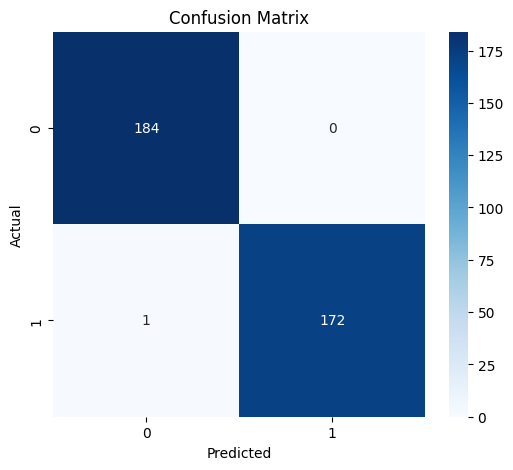

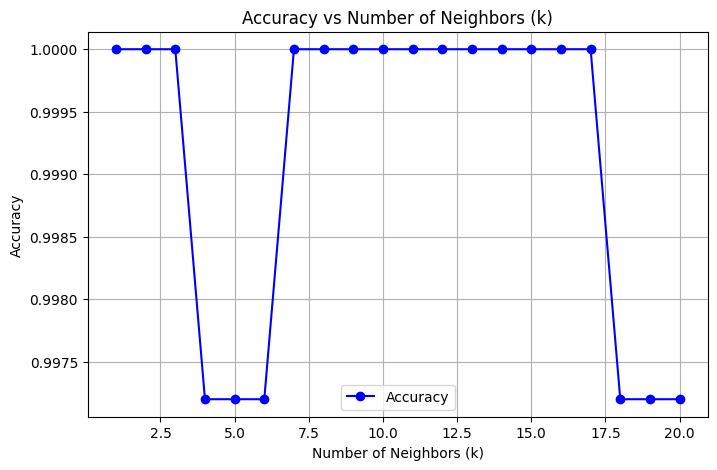

In [3]:
#Assignment 9 insights
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the dataset
file_path = 'rainfall.csv'
data = pd.read_csv(file_path)

# Convert the datetime column to a datetime object (optional for time-series exploration)
data['datetime'] = pd.to_datetime(data['datetime'], format='%d-%m-%Y')

# Data overview
print("Dataset Information:")
print(data.info())
print("\nFirst few rows of data:")
print(data.head())

# Data visualization
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


# Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x=data['preciptype'], palette="Set2")
plt.title("Distribution of Precipitation Types")
plt.xlabel("Precipitation Type")
plt.ylabel("Count")
plt.show()

# Define features (X) and target (y)
X = data[['temp', 'dew', 'humidity', 'sealevelpressure', 'winddir', 'solarradiation', 'windspeed', 'precipprob']]
y = data['preciptype']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Visualize the effect of scaling
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data=X_train, ax=ax[0])
ax[0].set_title("Before Scaling")
sns.boxplot(data=pd.DataFrame(X_train_scaled, columns=X.columns), ax=ax[1])
ax[1].set_title("After Scaling")
plt.tight_layout()
plt.show()

# Initialize and train the KNN classifier
k = 5  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy (k={k}): {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Find optimal value of k using accuracy scores
k_values = range(1, 21)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_k = knn.predict(X_test_scaled)
    accuracy_scores.append(accuracy_score(y_test, y_pred_k))

# Plot accuracy vs k
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scores, marker='o', color='b', label="Accuracy")
plt.title("Accuracy vs Number of Neighbors (k)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()
plt.show()


Accuracy: 0.93
Confusion Matrix:
 [[57  6]
 [ 1 36]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.90      0.94        63
           1       0.86      0.97      0.91        37

    accuracy                           0.93       100
   macro avg       0.92      0.94      0.93       100
weighted avg       0.94      0.93      0.93       100



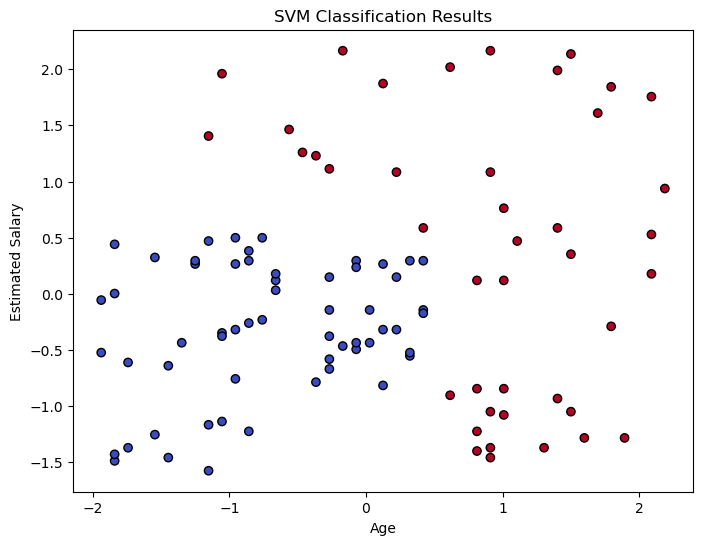

In [2]:
#Assignment 10
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv("Social_Network_Ads.csv")

# Select relevant features and target
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Visualization
plt.figure(figsize=(8,6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', edgecolors='k')
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.title("SVM Classification Results")
plt.show()

In [4]:
#Assignment 11
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
file_path = "spam_dataset.csv"
df = pd.read_csv(file_path)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df["message_content"], df["is_spam"], test_size=0.2, random_state=42)

# Convert text data into TF-IDF features
#converting the text data into numerical features using 
#TF-IDF (Term Frequency-Inverse Document Frequency) Vectorization.
vectorizer = TfidfVectorizer(stop_words="english") # converts the text into a TF-IDF matrix.
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Naïve Bayes classifier4

nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = nb_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)

FileNotFoundError: [Errno 2] No such file or directory: 'spam_dataset.csv'

Logistic Regression Accuracy: 1.00

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       184
           1       1.00      1.00      1.00       173

    accuracy                           1.00       357
   macro avg       1.00      1.00      1.00       357
weighted avg       1.00      1.00      1.00       357



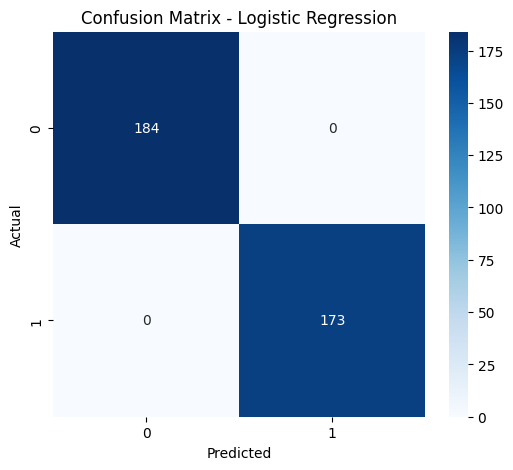

K-Nearest Neighbors (KNN) Accuracy: 1.00

Classification Report for K-Nearest Neighbors (KNN):
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       184
           1       1.00      0.99      1.00       173

    accuracy                           1.00       357
   macro avg       1.00      1.00      1.00       357
weighted avg       1.00      1.00      1.00       357



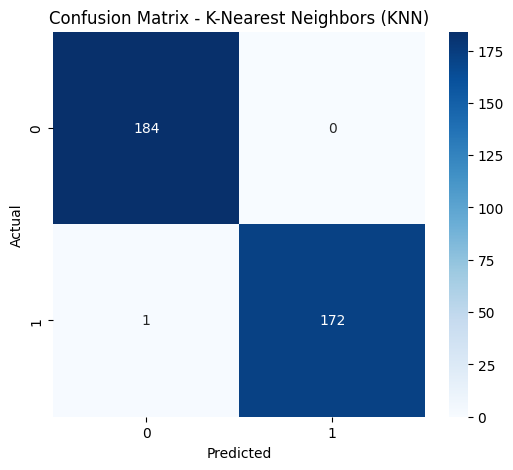

Support Vector Machine (SVM) Accuracy: 1.00

Classification Report for Support Vector Machine (SVM):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       184
           1       1.00      1.00      1.00       173

    accuracy                           1.00       357
   macro avg       1.00      1.00      1.00       357
weighted avg       1.00      1.00      1.00       357



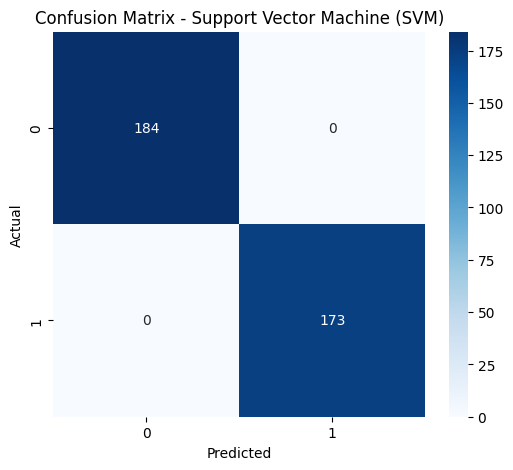

Naïve Bayes (GaussianNB) Accuracy: 1.00

Classification Report for Naïve Bayes (GaussianNB):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       184
           1       1.00      1.00      1.00       173

    accuracy                           1.00       357
   macro avg       1.00      1.00      1.00       357
weighted avg       1.00      1.00      1.00       357



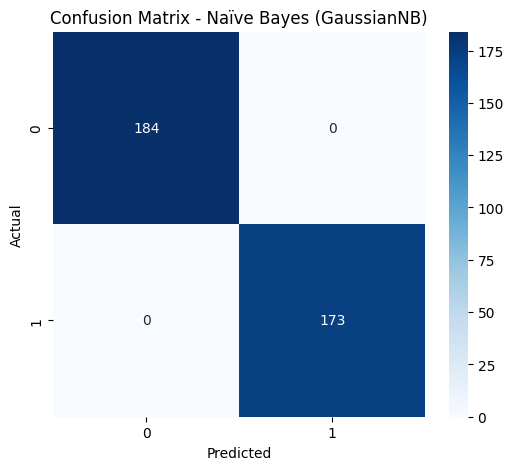

In [6]:
#Assignment 12
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
file_path = 'rainfall.csv'
data = pd.read_csv(file_path)

# Convert the datetime column to a datetime object
data['datetime'] = pd.to_datetime(data['datetime'], format='%d-%m-%Y')

# Define features (X) and target (y)
X = data[['temp', 'dew', 'humidity', 'sealevelpressure', 'winddir', 'solarradiation', 'windspeed', 'precipprob']]
y = data['preciptype']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to train and evaluate models
def evaluate_model(model, model_name):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.2f}\n")
    print(f"Classification Report for {model_name}:\n", classification_report(y_test, y_pred))
    
    # Confusion matrix visualization
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Models to evaluate
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine (SVM)": SVC(kernel='linear'),
    "Naïve Bayes (GaussianNB)": GaussianNB()
}

# Run evaluation for each model
for model_name, model in models.items():
    evaluate_model(model, model_name)
